In [1]:
from pinn import PINN
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU, Dense, Input

In [13]:
class OscillatorPINN(PINN):
    def __init__(self, x0, k, layers=None, name=None):
        super(OscillatorPINN, self).__init__(x0, lambda t, x: self.oscillator(t, x, k), layers=layers, name=name)

    def oscillator(self, t, x, k):
        dx = x[:,1]
        dy = -k*x[:,0]
        return tf.stack([dx, dy], 1)

    def oscillator_ode(self, t, x, k):
        dx = x[1]
        dy = -k*x[0]
        return [dx, dy]

    def plot(self):
        sol = solve_ivp(self.oscillator_ode, y0=[1.0,0.0], t_span=(0.,1.), args=(100.0,), max_step=0.01, method='RK45')

        fig = plt.figure(figsize=[10, 10])
        ax = fig.gca()
        l1, = ax.plot(sol.t, sol.y[0], label='Spring')
        l1.set_label("RK45")
        l2, = ax.plot(t.numpy(), model(t)[:,0])
        l2.set_label("NN")
        ax.legend()

In [14]:
model = OscillatorPINN([1.0,0.0], 100.0)
model.add(Input(1))
model.add(Dense(128, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(2))

In [15]:
t = tf.constant(np.linspace(0.,1.,1000), shape=(1000,1), dtype=tf.float32)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss="mse")
model.fit(t, epochs=1000)

6us/step - loss: 1.2785
Epoch 766/1000
32/32 [==============================] - 0s 797us/step - loss: 1.2250
Epoch 767/1000
32/32 [==============================] - 0s 798us/step - loss: 1.0535
Epoch 768/1000
32/32 [==============================] - 0s 834us/step - loss: 1.0257
Epoch 769/1000
32/32 [==============================] - 0s 798us/step - loss: 1.0791
Epoch 770/1000
32/32 [==============================] - 0s 822us/step - loss: 1.0444
Epoch 771/1000
32/32 [==============================] - 0s 795us/step - loss: 1.1341
Epoch 772/1000
32/32 [==============================] - 0s 816us/step - loss: 1.0755
Epoch 773/1000
32/32 [==============================] - 0s 861us/step - loss: 1.3643
Epoch 774/1000
32/32 [==============================] - 0s 832us/step - loss: 1.1543
Epoch 775/1000
32/32 [==============================] - 0s 839us/step - loss: 1.0006
Epoch 776/1000
32/32 [==============================] - 0s 814us/step - loss: 1.0532
Epoch 777/1000
32/32 [===================

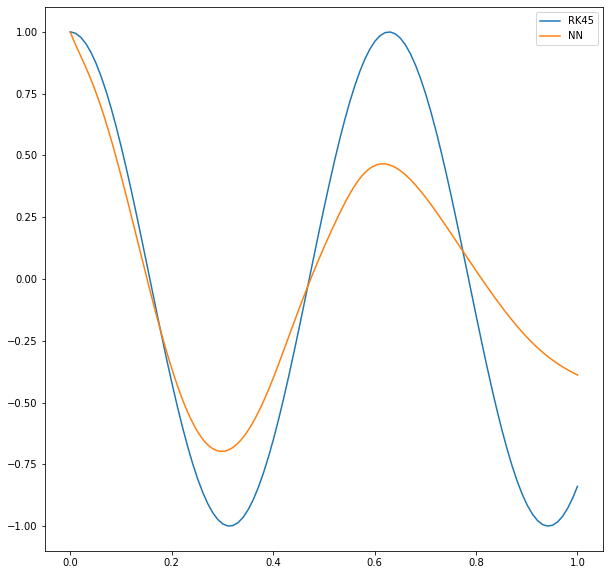

In [16]:
model.plot()